# Домашнее задание 2

## Распределение Бореля-Таннера
### Задание 2.1
### Моделирование случайных величин

Зададим функцию $genbt(\alpha, r)$, которая будет генерировать реализации случайной величины. 
При этом напомним, что $r \in \mathbb{Z}, r>0; 0< \alpha <1$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci

In [4]:
def genbt(alpha, r):
    def beta(x):
        return np.exp(-alpha)*alpha*x/(x-r)*(x/(x-1))**(x-r-2)
    p = np.exp(-alpha*r)
    rand = np.random.rand()
    x = r
    rand = rand-p
    while (rand>=0):
        x = x+1
        p = p*beta(x)
        rand = rand-p
    return x

Построим реализации выборок объема $n$, где $n \in \{5, 10, 100, 1000, 10^5\}$, и запишем их в список $A$  
Параметры $\alpha$ и $r$ зададим сами так, чтобы они удовлетворяли условиям.

In [5]:
alpha = 0.4
r = 2
count = 5
Abt = []
Nbt = [5, 10, 100, 1000, 100000]
for n in Nbt:
    m = []
    for _ in range(count):
        l = []
        for i in range(n):
            l.append(genbt(alpha, r))
        m.append(l)
    Abt.append(m)

И выведем для примера выборку объема $n = 10$

In [6]:
for i in range(len(Abt[1])):
    print (Abt[1][i])

[2, 3, 3, 2, 4, 12, 2, 4, 3, 3]
[10, 2, 3, 3, 3, 5, 4, 3, 4, 6]
[3, 3, 2, 2, 2, 6, 2, 3, 8, 2]
[4, 2, 2, 2, 3, 2, 5, 5, 4, 2]
[2, 4, 4, 4, 3, 12, 2, 6, 4, 4]


### Задание 2.2
### Построение эмпирической функции распределения

Пусть $\mu_n(y)$ - число элементов реализации выборки $\leq$ заданного $y$, тогда эмпирическая функция распределения $\hat{F}_n(y) = \frac{\mu_n(y)}{n}$

In [7]:
def fbt (r, a, x):
    return r/np.math.factorial(x-r)*float(x)**(x-r-1)*np.exp(-a*x)*a**(x-r)

def emperical(y, l):
    mu = 0
    for i in l:
        if (i<=y):
            mu+=1
    return float(mu)/len(l)

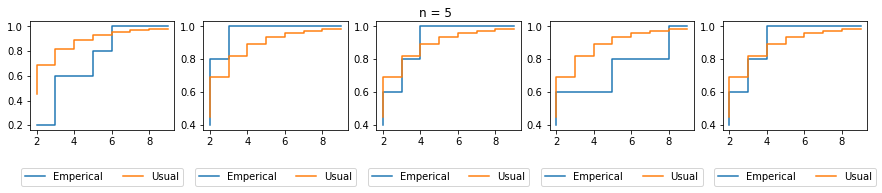

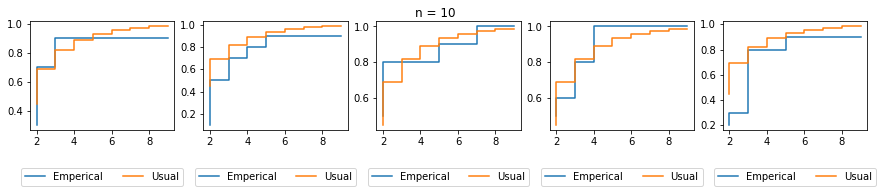

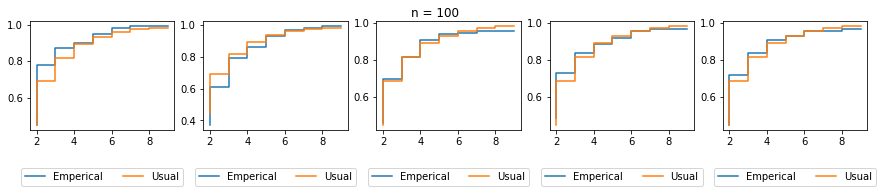

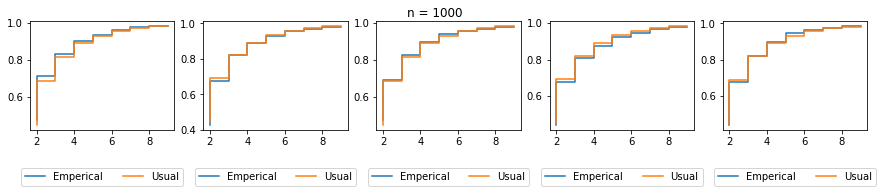

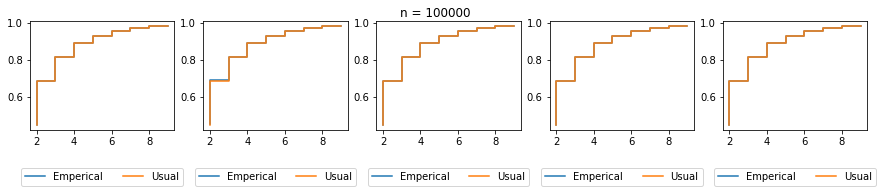

In [9]:
xbt = np.arange(2, 10)
for i in range(len(Abt)):
    fig, ax = plt.subplots(1, 5, figsize=(15, 2))
    fig.suptitle ('n = ' + str(Nbt[i]))
    for j in range(len(Abt[i])):
        y = list(map (lambda t: emperical(t, Abt[i][j]), xbt))
        ax[j].step(xbt, y, label = 'Emperical')
        summ = 0
        y2 = []
        for m in xbt:
            summ+=fbt(r, alpha, m)
            y2.append(summ)
        ax[j].step(xbt, y2, label = 'Usual')
        ax[j].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2)

In [10]:
print ('Верхние границы разниц эмпирических функций:')
for i in range(len(Abt)):
    print ('n = ' + str(Nbt[i]))
    for j in range(len(Abt[i])):
        for m in range (j+1, len(Abt[i])):
            maxim = abs(emperical(xbt[0], Abt[i][j])-emperical(xbt[0], Abt[i][m]))
            for xx in xbt:
                ab = abs(emperical(xx, Abt[i][j])-emperical(xx, Abt[i][m]))
                if maxim<ab:
                    maxim = ab
            print ('Для попыток ' + str(j+1)+ ' и '
                   + str(m+1) +' - ' + str("%.1f" % maxim))

Верхние границы разниц эмпирических функций:
n = 5
Для попыток 1 и 2 - 0.6
Для попыток 1 и 3 - 0.4
Для попыток 1 и 4 - 0.4
Для попыток 1 и 5 - 0.4
Для попыток 2 и 3 - 0.2
Для попыток 2 и 4 - 0.4
Для попыток 2 и 5 - 0.2
Для попыток 3 и 4 - 0.4
Для попыток 3 и 5 - 0.0
Для попыток 4 и 5 - 0.4
n = 10
Для попыток 1 и 2 - 0.2
Для попыток 1 и 3 - 0.2
Для попыток 1 и 4 - 0.2
Для попыток 1 и 5 - 0.4
Для попыток 2 и 3 - 0.4
Для попыток 2 и 4 - 0.4
Для попыток 2 и 5 - 0.2
Для попыток 3 и 4 - 0.2
Для попыток 3 и 5 - 0.5
Для попыток 4 и 5 - 0.3
n = 100
Для попыток 1 и 2 - 0.2
Для попыток 1 и 3 - 0.1
Для попыток 1 и 4 - 0.1
Для попыток 1 и 5 - 0.1
Для попыток 2 и 3 - 0.1
Для попыток 2 и 4 - 0.1
Для попыток 2 и 5 - 0.1
Для попыток 3 и 4 - 0.0
Для попыток 3 и 5 - 0.0
Для попыток 4 и 5 - 0.0
n = 1000
Для попыток 1 и 2 - 0.1
Для попыток 1 и 3 - 0.0
Для попыток 1 и 4 - 0.0
Для попыток 1 и 5 - 0.0
Для попыток 2 и 3 - 0.0
Для попыток 2 и 4 - 0.0
Для попыток 2 и 5 - 0.0
Для попыток 3 и 4 - 0.0
Для попыток 3

### Задание 2.3
### Построение вариационного ряда выборки

In [11]:
Abt_sort = []
for i in range(len(Abt)):
    l = []
    for j in range(len(Abt[i])):
        l.append(sorted(Abt[i][j]))
    Abt_sort.append(l)
for i in range(len(Abt_sort)-3):
    print ('n = ' + str(Nbt[i]))
    for j in range(len(Abt_sort)):
        print (Abt_sort[i][j])

n = 5
[2, 4, 4, 6, 7]
[2, 2, 3, 3, 4]
[2, 2, 3, 4, 5]
[2, 2, 3, 6, 9]
[2, 2, 3, 4, 5]
n = 10
[2, 2, 2, 3, 3, 3, 3, 4, 4, 12]
[2, 3, 3, 3, 3, 4, 4, 5, 6, 10]
[2, 2, 2, 2, 2, 3, 3, 3, 6, 8]
[2, 2, 2, 2, 2, 3, 4, 4, 5, 5]
[2, 2, 3, 4, 4, 4, 4, 4, 6, 12]


Найдем квантили заданных уровней:

In [12]:
lev = [0.1, 0.5, 0.7]
for i in lev:
    print ('Уровень квантиля = '+ str(i)+ '\n')
    for j in range(len(Abt_sort)):
        print('Выборка объема ' + str(Nbt[j]) + '\n')
        for m in range(len(Abt_sort[j])):
            kvv = int(i*Nbt[j])
            kv = Abt_sort[j][m][kvv]
            print ('Значение квантиля ' + str(kv))
        print ('\n')

Уровень квантиля = 0.1

Выборка объема 5

Значение квантиля 2
Значение квантиля 2
Значение квантиля 2
Значение квантиля 2
Значение квантиля 2


Выборка объема 10

Значение квантиля 2
Значение квантиля 3
Значение квантиля 2
Значение квантиля 2
Значение квантиля 2


Выборка объема 100

Значение квантиля 2
Значение квантиля 2
Значение квантиля 2
Значение квантиля 2
Значение квантиля 2


Выборка объема 1000

Значение квантиля 2
Значение квантиля 2
Значение квантиля 2
Значение квантиля 2
Значение квантиля 2


Выборка объема 100000

Значение квантиля 2
Значение квантиля 2
Значение квантиля 2
Значение квантиля 2
Значение квантиля 2


Уровень квантиля = 0.5

Выборка объема 5

Значение квантиля 4
Значение квантиля 3
Значение квантиля 3
Значение квантиля 3
Значение квантиля 3


Выборка объема 10

Значение квантиля 3
Значение квантиля 4
Значение квантиля 3
Значение квантиля 3
Значение квантиля 4


Выборка объема 100

Значение квантиля 3
Значение квантиля 3
Значение квантиля 3
Значение квантиля 3


Сравним их с квантилями нашего распределения:

In [13]:
def kv_bt (alpha, r, kv, xbt):
    summ = 0
    for x in xbt:
        summ += fbt(r, alpha, x)
        if summ>=kv:
            return x

In [14]:
for i in lev:
    print ('Квантиль уровня '+ str(i) + ' равен ' + str(kv_bt(alpha, r, i, xbt)))

Квантиль уровня 0.1 равен 2
Квантиль уровня 0.5 равен 3
Квантиль уровня 0.7 равен 4


Построим гистограмму и полигон частот

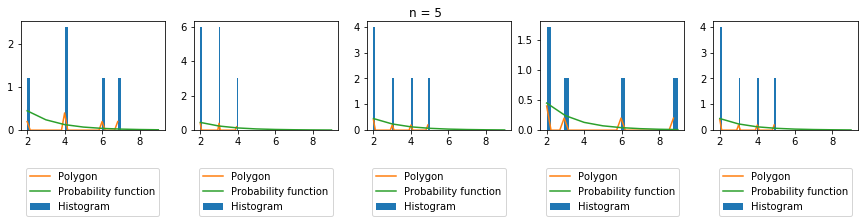

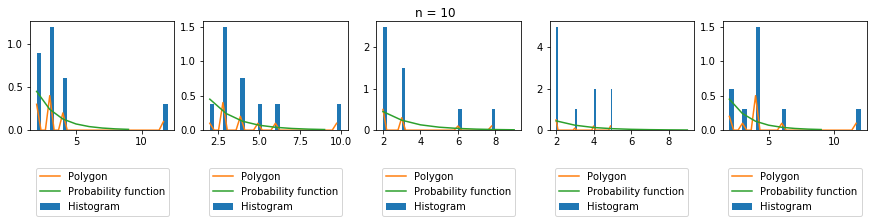

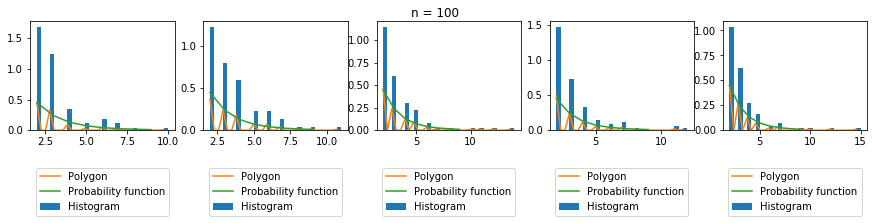

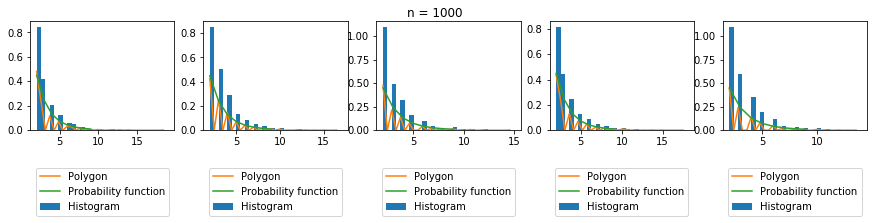

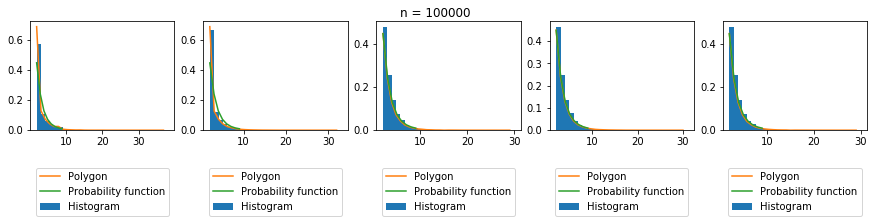

In [18]:
for i in range(len(Abt_sort)):
    fig, ax = plt.subplots(1, 5, figsize=(15, 2))
    fig.suptitle ('n = ' + str(Nbt[i]))
    for j in range(len(Abt_sort[i])):
        x = Abt_sort[i][j]
        ##print (x)
        ax[j].hist (x, label = 'Histogram', density = True, bins = 30)
        ##print (np.histogram(x))
        yy = []
        for k in np.histogram(x, bins = 30)[0]:
            yy.append (k/Nbt[i])
        ax[j].plot (np.histogram(x, bins = 30)[1][:-1], yy, label = 'Polygon')
        y = []
        for k in xbt:
            y.append (fbt(r, alpha, k))
        ax[j].plot (xbt, y, label = 'Probability function')
        ax[j].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=1)

        #y = list(map (lambda t: emperical(t, Abt_[i][j]), xbt))
        #ax[j].step(xbt, y)

## Распределение Лапласа
### Задание 2.1
### Моделирование случайных величин

Зададим функцию $genl(\mu, \lambda)$, которая будет генерировать реализации случайной величины. 
При этом напомним, что $\lambda, \mu \in \mathbb{R}, \lambda>0$

In [15]:
def genl(mu, l):
    r1 = np.random.rand()
    r2 = np.random.rand()
    return mu + 1/l*np.log(r1/r2)

Построим реализации выборок объема $n$, где $n \in \{5, 10, 100, 1000, 10^5\}$, и запишем их в список $A$  
Параметры $\mu$ и $\lambda$ зададим сами так, чтобы они удовлетворяли условиям.

In [16]:
lam = 1.2
mu = 10
Al = []
Nl = [5, 10, 100, 1000, 100000]
for n in Nl:
    m = []
    for _ in range(count):
        l = []
        for i in range(n):
            l.append(genl(mu, lam))
        m.append(l)
    Al.append(m)

И выведем для примера выборку объема $n = 10$

In [43]:
print (Al[1][1])

[10.60732551320869, 8.926531599293043, 10.01083037166817, 8.744896452815642, 10.244871143689767, 9.560622191895574, 9.00181356372586, 10.183934502740064, 10.091472100836333, 9.19971058067347]


### Задание 2.2
### Построение эмпирической функции распределения

Функция для вычисления эмпирической функции распределения останется той же, что и в дискретном распределении

In [20]:
def fl (mu, lam, x):
    return 1/2*lam*np.exp(-lam*abs(x-mu))

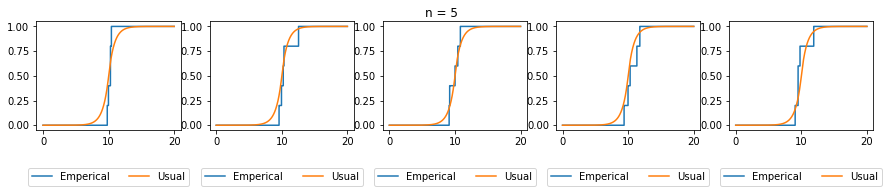

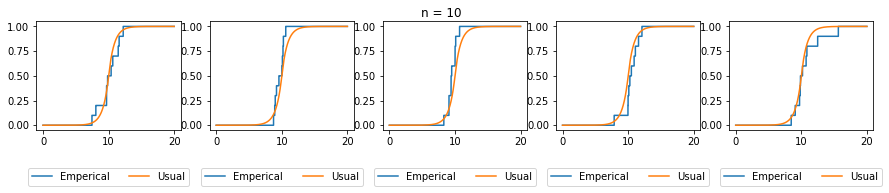

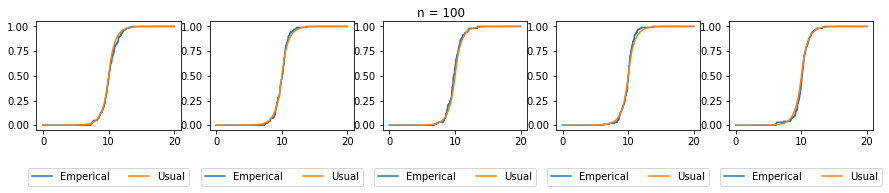

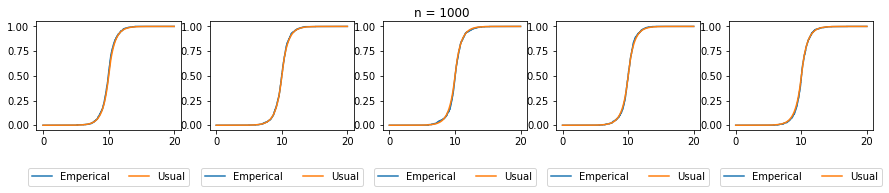

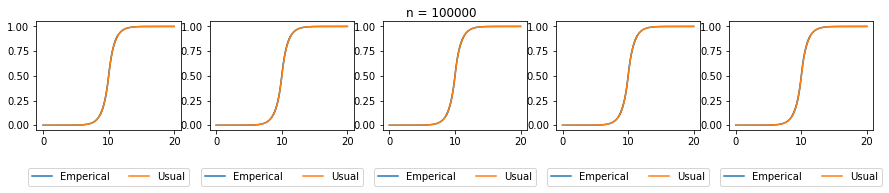

In [21]:
xl = np.arange(0, 20, 0.01)
for i in range(len(Al)):
    fig, ax = plt.subplots(1, 5, figsize=(15, 2))
    fig.suptitle ('n = ' + str(Nl[i]))
    for j in range(len(Abt[i])):
        y = list(map (lambda t: emperical(t, Al[i][j]), xl))
        ax[j].step(xl, y, label = 'Emperical')
        summ = 0
        y2 = list(map(lambda m: sci.quad(lambda x: fl(mu, lam, x), -np.inf, m)[0], xl))
        ax[j].plot(xl, y2, label = 'Usual')
        ax[j].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2)

In [44]:
print ('Верхние границы разниц эмпирических функций:')
for i in range(len(Al)):
    print ('n = ' + str(Nl[i]))
    for j in range(len(Al[i])):
        for m in range (j+1, len(Al[i])):
            maxim = abs(emperical(xl[0], Al[i][j])-emperical(xl[0], Al[i][m]))
            for xx in xl:
                ab = abs(emperical(xx, Al[i][j])-emperical(xx, Al[i][m]))
                if maxim<ab:
                    maxim = ab
            print ('Для попыток ' + str(j+1)+ ' и '
                   + str(m+1) +' - ' + str("%.1f" % maxim))

Верхние границы разниц эмпирических функций:
n = 5
Для попыток 1 и 2 - 0.2
Для попыток 1 и 3 - 0.4
Для попыток 1 и 4 - 0.4
Для попыток 1 и 5 - 0.6
Для попыток 2 и 3 - 0.4
Для попыток 2 и 4 - 0.2
Для попыток 2 и 5 - 0.6
Для попыток 3 и 4 - 0.4
Для попыток 3 и 5 - 0.4
Для попыток 4 и 5 - 0.6
n = 10
Для попыток 1 и 2 - 0.4
Для попыток 1 и 3 - 0.4
Для попыток 1 и 4 - 0.4
Для попыток 1 и 5 - 0.2
Для попыток 2 и 3 - 0.2
Для попыток 2 и 4 - 0.5
Для попыток 2 и 5 - 0.4
Для попыток 3 и 4 - 0.5
Для попыток 3 и 5 - 0.4
Для попыток 4 и 5 - 0.4
n = 100
Для попыток 1 и 2 - 0.1
Для попыток 1 и 3 - 0.1
Для попыток 1 и 4 - 0.1
Для попыток 1 и 5 - 0.1
Для попыток 2 и 3 - 0.1
Для попыток 2 и 4 - 0.1
Для попыток 2 и 5 - 0.1
Для попыток 3 и 4 - 0.2
Для попыток 3 и 5 - 0.2
Для попыток 4 и 5 - 0.1
n = 1000
Для попыток 1 и 2 - 0.0
Для попыток 1 и 3 - 0.1
Для попыток 1 и 4 - 0.0
Для попыток 1 и 5 - 0.1
Для попыток 2 и 3 - 0.0
Для попыток 2 и 4 - 0.0
Для попыток 2 и 5 - 0.0
Для попыток 3 и 4 - 0.0
Для попыток 3

### Задание 2.3
### Построение вариационного ряда выборки

In [23]:
Al_sort = []
for i in range(len(Al)):
    l = []
    for j in range(len(Al[i])):
        l.append(sorted(Al[i][j]))
    Al_sort.append(l)
for i in range(len(Al_sort)-3):
    print ('n = ' + str(Nl[i]))
    for j in range(len(Al_sort)):
        print (Al_sort[i][j])

n = 5
[9.799653144896995, 9.974647959993309, 10.272433086890068, 10.280044740283017, 10.425189491687728]
[9.587664408124768, 9.958809158237843, 10.229206820693637, 10.330582099960198, 12.557657119914925]
[9.111081113915628, 9.194648937374245, 10.011350069620278, 10.43267429306871, 10.82850380757356]
[9.382150436485192, 9.98909946387536, 10.305735512545978, 11.332847156982533, 11.78798248860461]
[9.060264850350663, 9.508693969352032, 9.510853377852813, 9.801277108269197, 11.892878749123808]
n = 10
[7.468179896404395, 8.052661670148202, 9.682300141507614, 9.693200478662673, 9.841502395016125, 10.38467072179635, 10.633155981093106, 11.464300233952077, 11.603153545075113, 12.222889630995162]
[8.744896452815642, 8.926531599293043, 9.00181356372586, 9.19971058067347, 9.560622191895574, 10.01083037166817, 10.091472100836333, 10.183934502740064, 10.244871143689767, 10.60732551320869]
[8.30384270210321, 9.083241088731876, 9.095875418109694, 9.404376255769467, 9.412588239334767, 9.50717051691116

Вычисление квантилей уровней 0.1, 0.5 и 0.7:

In [24]:
lev = [0.1, 0.5, 0.7]
for i in lev:
    print ('Уровень квантиля = '+ str(i)+ '\n')
    for j in range(len(Al_sort)):
        print('Выборка объема ' + str(Nl[j])+ '\n')
        for m in range(len(Al_sort[j])):
            kvv = int(i*Nl[j])
            kv = Al_sort[j][m][kvv]
            print ('Значение квантиля ' + str(kv))
        print('\n')

Уровень квантиля = 0.1

Выборка объема 5

Значение квантиля 9.799653144896995
Значение квантиля 9.587664408124768
Значение квантиля 9.111081113915628
Значение квантиля 9.382150436485192
Значение квантиля 9.060264850350663


Выборка объема 10

Значение квантиля 8.052661670148202
Значение квантиля 8.926531599293043
Значение квантиля 9.083241088731876
Значение квантиля 9.973693159598879
Значение квантиля 9.076585952349895


Выборка объема 100

Значение квантиля 8.7318286824055
Значение квантиля 8.906802402261953
Значение квантиля 8.596195788593361
Значение квантиля 8.752405616262294
Значение квантиля 9.084183111141687


Выборка объема 1000

Значение квантиля 8.577980288077661
Значение квантиля 8.70896086273307
Значение квантиля 8.740581206991171
Значение квантиля 8.716845137214657
Значение квантиля 8.774067951891132


Выборка объема 100000

Значение квантиля 8.655762269392959
Значение квантиля 8.642318012805264
Значение квантиля 8.659226703633964
Значение квантиля 8.648903308839774
Значен

Сравним их с квантилями нашего распределения:

In [25]:
def kv_l (mu, lam, kv):
    for x in xl:
        cin = sci.quad(lambda t: fl(mu, lam, t), -np.inf, x)[0]
        if cin>=kv:
            return x

In [26]:
for i in lev:
    print ('Квантиль уровня '+ str(i) + ' равен ' + str(kv_l(mu, lam, i)))

Квантиль уровня 0.1 равен 8.66
Квантиль уровня 0.5 равен 10.0
Квантиль уровня 0.7 равен 10.43


Построим гистограмму и полигон частот

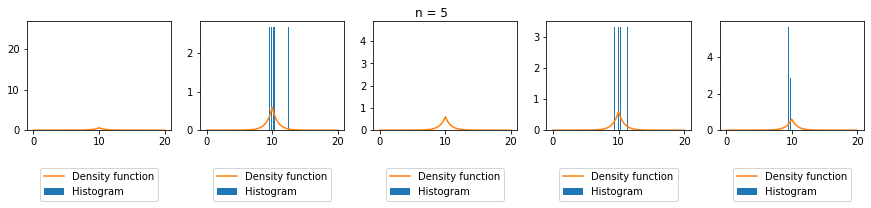

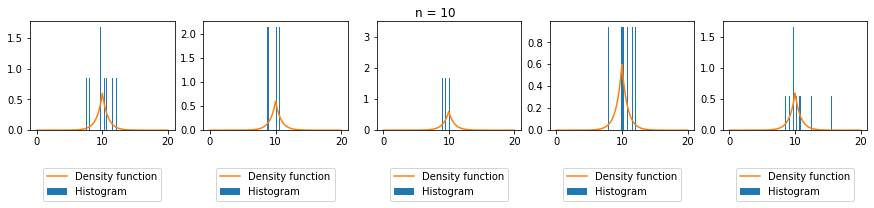

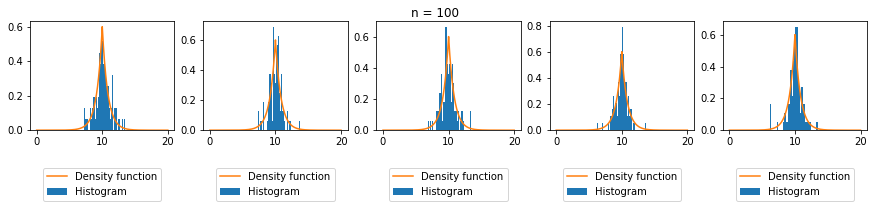

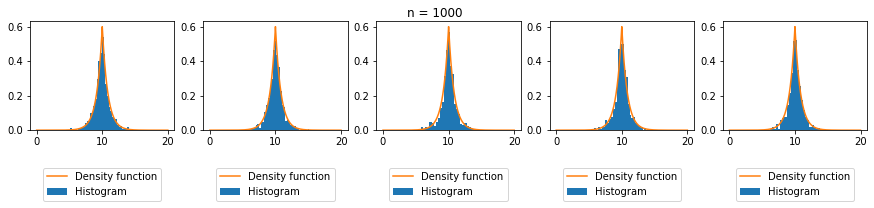

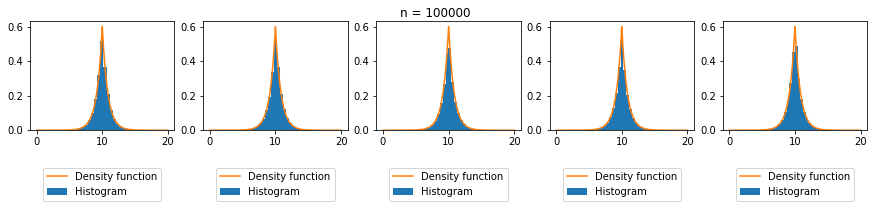

In [27]:
for i in range(len(Al_sort)):
    fig, ax = plt.subplots(1, 5, figsize=(15, 2))
    fig.suptitle ('n = ' + str(Nl[i]))
    for j in range(len(Abt_sort[i])):
        x = Al_sort[i][j]
        ##print (x)
        ax[j].hist (x, label = 'Histogram', density = True, bins = 40)
        ##print (np.histogram(x))
        y = []
        for k in xl:
            y.append (fl(mu, lam, k))
        ax[j].plot (xl, y, label = 'Density function')
        ax[j].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=1)

# Домашнее задание 3

## Распределение Бореля-Таннера

### Задание 3.1

### Нахождение выборочного среднего и выборочной дисперсии

Выборочное среднее - это выборочный момент порядка 1: $$\hat{\alpha}_1 = \frac{1}{n}\sum_{i=0}^nx_i$$  
А выборочная дисперсия - это выборочный центральный момент порядка 2: $$\hat{\mu}_2 = \frac{1}{n}\sum_{i=1}^n(x_i-\hat{\alpha}_1)^2$$

In [28]:
def sample_mean (l):
    return sum(l)/len(l)
def sample_variance (l):
    return sum(list(map(lambda t: (t-sample_mean(l))**2, l)))/len(l)

In [29]:
for i in range(len(Abt)):
    print ('n =', Nbt[i])
    for j in range(len(Abt[i])):
        print ('У', j+1, 'выборки:', '\t', 'Выборочное среднее =', "%.2f" % sample_mean(Abt[i][j]),
               '\t', 'Выборочная дисперсия =', "%.2f" % sample_variance(Abt[i][j]))

n = 5
У 1 выборки: 	 Выборочное среднее = 4.60 	 Выборочная дисперсия = 3.04
У 2 выборки: 	 Выборочное среднее = 2.80 	 Выборочная дисперсия = 0.56
У 3 выборки: 	 Выборочное среднее = 3.20 	 Выборочная дисперсия = 1.36
У 4 выборки: 	 Выборочное среднее = 4.40 	 Выборочная дисперсия = 7.44
У 5 выборки: 	 Выборочное среднее = 3.20 	 Выборочная дисперсия = 1.36
n = 10
У 1 выборки: 	 Выборочное среднее = 3.80 	 Выборочная дисперсия = 7.96
У 2 выборки: 	 Выборочное среднее = 4.30 	 Выборочная дисперсия = 4.81
У 3 выборки: 	 Выборочное среднее = 3.30 	 Выборочная дисперсия = 3.81
У 4 выборки: 	 Выборочное среднее = 3.10 	 Выборочная дисперсия = 1.49
У 5 выборки: 	 Выборочное среднее = 4.50 	 Выборочная дисперсия = 7.45
n = 100
У 1 выборки: 	 Выборочное среднее = 3.09 	 Выборочная дисперсия = 2.32
У 2 выборки: 	 Выборочное среднее = 3.51 	 Выборочная дисперсия = 3.09
У 3 выборки: 	 Выборочное среднее = 3.37 	 Выборочная дисперсия = 4.63
У 4 выборки: 	 Выборочное среднее = 3.27 	 Выборочная ди

Выборочное среднее - это несмещенная оценка матожидания случайной величины, а выборочная дисперсия - это смещенная оценка дисперсии случайной величины. Обе оценки будут состоятельными, то есть будут стремиться к оцениваемому значению при стремлении объема выборки к бесконечности:  
$$\hat{\alpha}_1 \xrightarrow[]{n \to \infty} E\xi$$
$$\hat{\mu}_2 \xrightarrow[]{n \to \infty} D\xi$$

Посчитаем истинные значения параметров:

$$E\xi = \frac{r}{1-\alpha} = \frac{2}{1-0.4} = 3.33$$  
$$D\xi = \frac{\alpha r}{(1-\alpha)^3} = \frac{0.4 * 2}{(1-0.4)^3} = 3.70$$

Заметно, что при большом $n$ значения оценок и правда стремятся к значениям оцениваемых параметров

### Задание 3.2
### Нахождение параметров распределений событий

С помощью метода максимального правдоподобия оценим параметр $\alpha$ нашего распределения  
$$\begin{gathered}
P(\xi=k) = \frac{r}{(k-r)!}k^{k-r-1}e^{-\alpha k}\alpha^{k-r}\\
L_{\alpha, r}(\bar{x}) = \Pi_{i=1}^n \frac{r}{(k-r)!}k^{k-r-1}e^{-\alpha k}\alpha^{k-r}\\
\ln L_{\alpha, r}(\bar{x}) = \sum_{i=1}^n(\ln r - \ln(x_i-r)! + (x_i-r-1)\ln x_i - \alpha x_i + (x_i-r)\ln\alpha)\\
\frac{\partial\ln L_{\alpha, r}(\bar{x})}{\partial\alpha} = \sum_{i=1}^n(-x_i + \frac{x_i-r}{\alpha}) = 0\\
-n\frac{r}{\alpha} + \sum_{i=1}^n(\frac{x_i}{\alpha} - x_i) = 0\\
nr = \sum_{i=1}^n x_i(1-\alpha)\\
nr = (1-\alpha)\sum_{i=1}^n x_i\\
1-\alpha = \frac{r}{\overline{x}}\\
\hat{\alpha} = 1 - \frac{r}{\overline{x}}\end{gathered}$$

$$E\hat{\alpha} = 1 - rE(\frac{1}{\overline x}) = 1 - rE(\frac{1-\alpha}{r}) = 1 - 1 + \alpha = \alpha$$
То есть оценка является несмещенной  
Также оценка очевидно будет состоятельной (доказывается практически идентичным образом, только без матожидания)  
Также оценка будет являться оптимальной и эффективной

Проверка оценки на данных:

In [35]:
for j in range(len(Abt_sort)):
    for m in range(len(Abt_sort[j])):
        print ('Для выборки объема', Nbt[j], 'значение оценки будет',  "%.2f" % (1-r/np.mean(Abt_sort[j][m])))
    print ('\n')

Для выборки объема 5 значение оценки будет 0.57
Для выборки объема 5 значение оценки будет 0.29
Для выборки объема 5 значение оценки будет 0.38
Для выборки объема 5 значение оценки будет 0.55
Для выборки объема 5 значение оценки будет 0.38


Для выборки объема 10 значение оценки будет 0.47
Для выборки объема 10 значение оценки будет 0.53
Для выборки объема 10 значение оценки будет 0.39
Для выборки объема 10 значение оценки будет 0.35
Для выборки объема 10 значение оценки будет 0.56


Для выборки объема 100 значение оценки будет 0.35
Для выборки объема 100 значение оценки будет 0.43
Для выборки объема 100 значение оценки будет 0.41
Для выборки объема 100 значение оценки будет 0.39
Для выборки объема 100 значение оценки будет 0.40


Для выборки объема 1000 значение оценки будет 0.38
Для выборки объема 1000 значение оценки будет 0.41
Для выборки объема 1000 значение оценки будет 0.39
Для выборки объема 1000 значение оценки будет 0.42
Для выборки объема 1000 значение оценки будет 0.40


Дл

Из посчитанных значений видно, что значение оценки быстро приближается к значению нашего параметра

## Распределение Лапласа
### Задание 3.1
### Нахождение выборочного среднего и выборочной дисперсии

Найдем выборочное среднее и выборочную дисперсию по тем же формулам, что и выше

In [129]:
for i in range(len(Al)):
    print ('n =', Nl[i])
    for j in range(len(Al[i])):
        print ('У', j+1, 'выборки:', '\t', 'Выборочное среднее =', "%.2f" % sample_mean(Al[i][j]),
               '\t', 'Выборочная дисперсия =', "%.2f" % sample_variance(Al[i][j]))

n = 5
У 1 выборки: 	 Выборочное среднее = 10.63 	 Выборочная дисперсия = 3.29
У 2 выборки: 	 Выборочное среднее = 10.18 	 Выборочная дисперсия = 0.41
У 3 выборки: 	 Выборочное среднее = 8.59 	 Выборочная дисперсия = 2.62
У 4 выборки: 	 Выборочное среднее = 9.36 	 Выборочная дисперсия = 0.49
У 5 выборки: 	 Выборочное среднее = 10.07 	 Выборочная дисперсия = 0.62
n = 10
У 1 выборки: 	 Выборочное среднее = 9.59 	 Выборочная дисперсия = 2.69
У 2 выборки: 	 Выборочное среднее = 10.19 	 Выборочная дисперсия = 0.35
У 3 выборки: 	 Выборочное среднее = 9.92 	 Выборочная дисперсия = 0.98
У 4 выборки: 	 Выборочное среднее = 10.12 	 Выборочная дисперсия = 0.92
У 5 выборки: 	 Выборочное среднее = 10.55 	 Выборочная дисперсия = 0.62
n = 100
У 1 выборки: 	 Выборочное среднее = 9.92 	 Выборочная дисперсия = 1.53
У 2 выборки: 	 Выборочное среднее = 10.06 	 Выборочная дисперсия = 1.58
У 3 выборки: 	 Выборочное среднее = 9.79 	 Выборочная дисперсия = 1.13
У 4 выборки: 	 Выборочное среднее = 10.00 	 Выбор

Посчитаем истинные значения параметров: 
$$E\xi = \mu = 10$$
$$D\xi = \frac{2}{\lambda^2} = \frac{2}{1.2^2} = 1.39$$

Заметно, что при большом $n$ значения оценок и правда стремятся к значениям оцениваемых параметров

### Задание 3.2
### Нахождение параметров распределений событий

С помощью метода максимального правдоподобия оценим параметры $\mu$ и $\lambda$ нашего распределения:
$$f_\xi(x) = \frac{1}{2}\lambda e^{-\lambda|x-\mu|}$$
$$L_{\lambda, \mu}(\bar{x}) = \Pi_{i=1}^n \frac{1}{2}\lambda e^{-\lambda|x-\mu|}$$
$$\ln L_{\lambda, \mu}(\bar{x}) = \sum_{i=1}^n \ln(\frac{1}{2}\lambda e^{-\lambda|x_i-\mu|}) = n\centerdot \ln\frac{1}{2} + n\centerdot \ln\lambda - \lambda \sum_{i=1}^n|x_i-\mu|$$
$\ln L$ при $\lambda = const$ будет принимать максимальное значение при минимальном значении $\sum_{i=1}^n|x_i-\mu|$, следовательно:  

$$\hat{\mu} = \begin{cases}
   x_{\frac{n+1}{2}} &\text{, } n \text{ - нечетное}\\
   \frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2} &\text{, } n \text{ - четное}
\end{cases}$$

Теперь оценим значение параметра $\lambda$:
$$\frac{\partial\ln L}{\partial\lambda} = \frac{n}{\lambda} - \sum_{i=1}^n|x_i-\mu| = 0$$
$$\hat{\lambda} = \frac{n}{\sum_{i=1}^n|x_i-\mu|}$$

Теперь докажем, что оценка параметра $\mu$ является несмещенной:
$$E(\hat{\mu}) = \begin{cases}
   E(x_{\frac{n+1}{2}}) = \mu &\text{, } n \text{ - нечетное (1)} \\
   E(\frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2}) = \frac{2\mu}{2} = \mu &\text{, } n \text{ - четное (2)} 
\end{cases}$$

То есть для $\forall n$ $E(\hat{\mu}) = \mu$, то есть $\hat{\mu}$ является несмещенной оценкой
$\hat{\mu}$ - это медиана (очевидно следует из формулы, задающей эту оценку), а медиана для данного распределения равняется $\mu$, следовательно наша оценка будет стремиться к оцениваемому параметру при $n \to \infty$, то есть будет состоятельной  
Оценка также будет являться оптимальной, так как среднеквадратическое ее отклонение будет = 0 (то есть будет минимальным)  
Также оценка будет являться эффективной

Теперь рассмотрим на оценку $\hat{\lambda}$  
Известно, что распределение Лапласа являться экспоненциальной моделью, что следует из вида ее плотности вероятности:
$$\begin{gathered}f(x, \lambda) = exp[A(\lambda)B(x) + C(\lambda) + D(x)]\\
f(x, \lambda) = \frac{1}{2}\lambda e^{-\lambda |x-\mu|} = e^{-\lambda |x-\mu| + ln(\frac{\lambda}{2})}\\
A(\lambda) = -\lambda, B(x) = |x-\mu|, C(\lambda) = \ln\frac{\lambda}{2}\end{gathered}$$
Тогда по критерию Рао-Крамера статистика $T = \frac{1}{n}\sum_{i=1}^{n}B(x_i)$ будет эффективной для $\tau(\lambda) = -\frac{C'(\lambda)}{A(\lambda)} = \frac{1}{\lambda}$
Тогда:
$$\begin{gathered} \frac{1}{\lambda} = \frac{1}{n}\sum_{i=1}^n|x_i-\mu|\\
\hat{\lambda} = \frac{n}{\sum_{i=1}^n|x_i-\mu|}\end{gathered}$$
То есть найденная выше оценка $\hat{\lambda}$ будет эффективной, а значит и оптимальной

Проверка оценки параметра $\mu$ на данных:

In [38]:
for j in range(len(Al_sort)):
    if (Nl[j]%2==0):
        fl = True
    else:
        fl = False
    for m in range(len(Al_sort[j])):
        if (fl):
            est = (Al_sort[j][m][Nl[j]//2-1] + Al_sort[j][m][Nl[j]//2])/2
        else:
            est = Al_sort[j][m][(Nl[j]+1)//2-1]
        print ('Для выборки объема', Nbt[j], 'значение оценки будет',  "%.2f" % est)
    print ('\n')

Для выборки объема 5 значение оценки будет 10.27
Для выборки объема 5 значение оценки будет 10.23
Для выборки объема 5 значение оценки будет 10.01
Для выборки объема 5 значение оценки будет 10.31
Для выборки объема 5 значение оценки будет 9.51


Для выборки объема 10 значение оценки будет 10.11
Для выборки объема 10 значение оценки будет 9.79
Для выборки объема 10 значение оценки будет 9.46
Для выборки объема 10 значение оценки будет 10.38
Для выборки объема 10 значение оценки будет 10.03


Для выборки объема 100 значение оценки будет 10.04
Для выборки объема 100 значение оценки будет 10.07
Для выборки объема 100 значение оценки будет 9.81
Для выборки объема 100 значение оценки будет 10.04
Для выборки объема 100 значение оценки будет 10.11


Для выборки объема 1000 значение оценки будет 9.97
Для выборки объема 1000 значение оценки будет 9.99
Для выборки объема 1000 значение оценки будет 10.03
Для выборки объема 1000 значение оценки будет 10.01
Для выборки объема 1000 значение оценки бу

Из посчитанных значений видно, что значение оценки быстро приближается к значению нашего параметра

Теперь проверим оценку параметра $\lambda$ на данных:

In [41]:
for j in range(len(Al_sort)):
    for m in range(len(Al_sort[j])):
        summ = 0
        for i in Al_sort[j][m]:
            summ+=abs(i-mu)
        print ('Для выборки объема', Nbt[j], 'значение оценки будет',  "%.2f" % (Nl[j]/summ))
    print ('\n')

Для выборки объема 5 значение оценки будет 4.16
Для выборки объема 5 значение оценки будет 1.40
Для выборки объема 5 значение оценки будет 1.69
Для выборки объема 5 значение оценки будет 1.23
Для выборки объема 5 значение оценки будет 1.25


Для выборки объема 10 значение оценки будет 0.86
Для выборки объема 10 значение оценки будет 1.75
Для выборки объема 10 значение оценки будет 1.65
Для выборки объема 10 значение оценки будет 1.14
Для выборки объема 10 значение оценки будет 0.77


Для выборки объема 100 значение оценки будет 1.11
Для выборки объема 100 значение оценки будет 1.34
Для выборки объема 100 значение оценки будет 1.21
Для выборки объема 100 значение оценки будет 1.46
Для выборки объема 100 значение оценки будет 1.26


Для выборки объема 1000 значение оценки будет 1.22
Для выборки объема 1000 значение оценки будет 1.22
Для выборки объема 1000 значение оценки будет 1.19
Для выборки объема 1000 значение оценки будет 1.26
Для выборки объема 1000 значение оценки будет 1.25


Дл

Видно, что оценка также сходится к значению оцениваемого параметра